In [1]:
import csv
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img


In [2]:
TRAINING_FILE=pd.read_csv("sign_mnist_train.csv")
VALIDATION_FILE=pd.read_csv("sign_mnist_test.csv")

In [3]:
TRAINING_FILE.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
VALIDATION_FILE.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
import csv
import numpy as np

def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')
        imgs = []
        labels = []
        next(reader, None)  # Skip the header row
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))
            imgs.append(img)
            labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels


In [9]:
import csv
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Load the data into DataFrames
TRAINING_FILE = pd.read_csv("sign_mnist_train.csv")
VALIDATION_FILE = pd.read_csv("sign_mnist_test.csv")

def parse_data_from_df(df):
    imgs = []
    labels = []
    for _, row in df.iterrows():
        label = row[0]
        data = row[1:].values
        img = np.array(data).reshape((28, 28))
        imgs.append(img)
        labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

# Parse the data from DataFrames
training_images, training_labels = parse_data_from_df(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_df(VALIDATION_FILE)

# Print the shapes of the arrays
print(f"Training images have shape: {training_images.shape}")
print(f"Training labels have shape: {training_labels.shape}")

print(f"Validation images have shape: {validation_images.shape}")
print(f"Validation labels have shape: {validation_labels.shape}")


C:\Users\89339\AppData\Local\Temp\ipykernel_30180\1052101547.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[0]


Training images have shape: (27455, 28, 28)
Training labels have shape: (27455,)
Validation images have shape: (7172, 28, 28)
Validation labels have shape: (7172,)


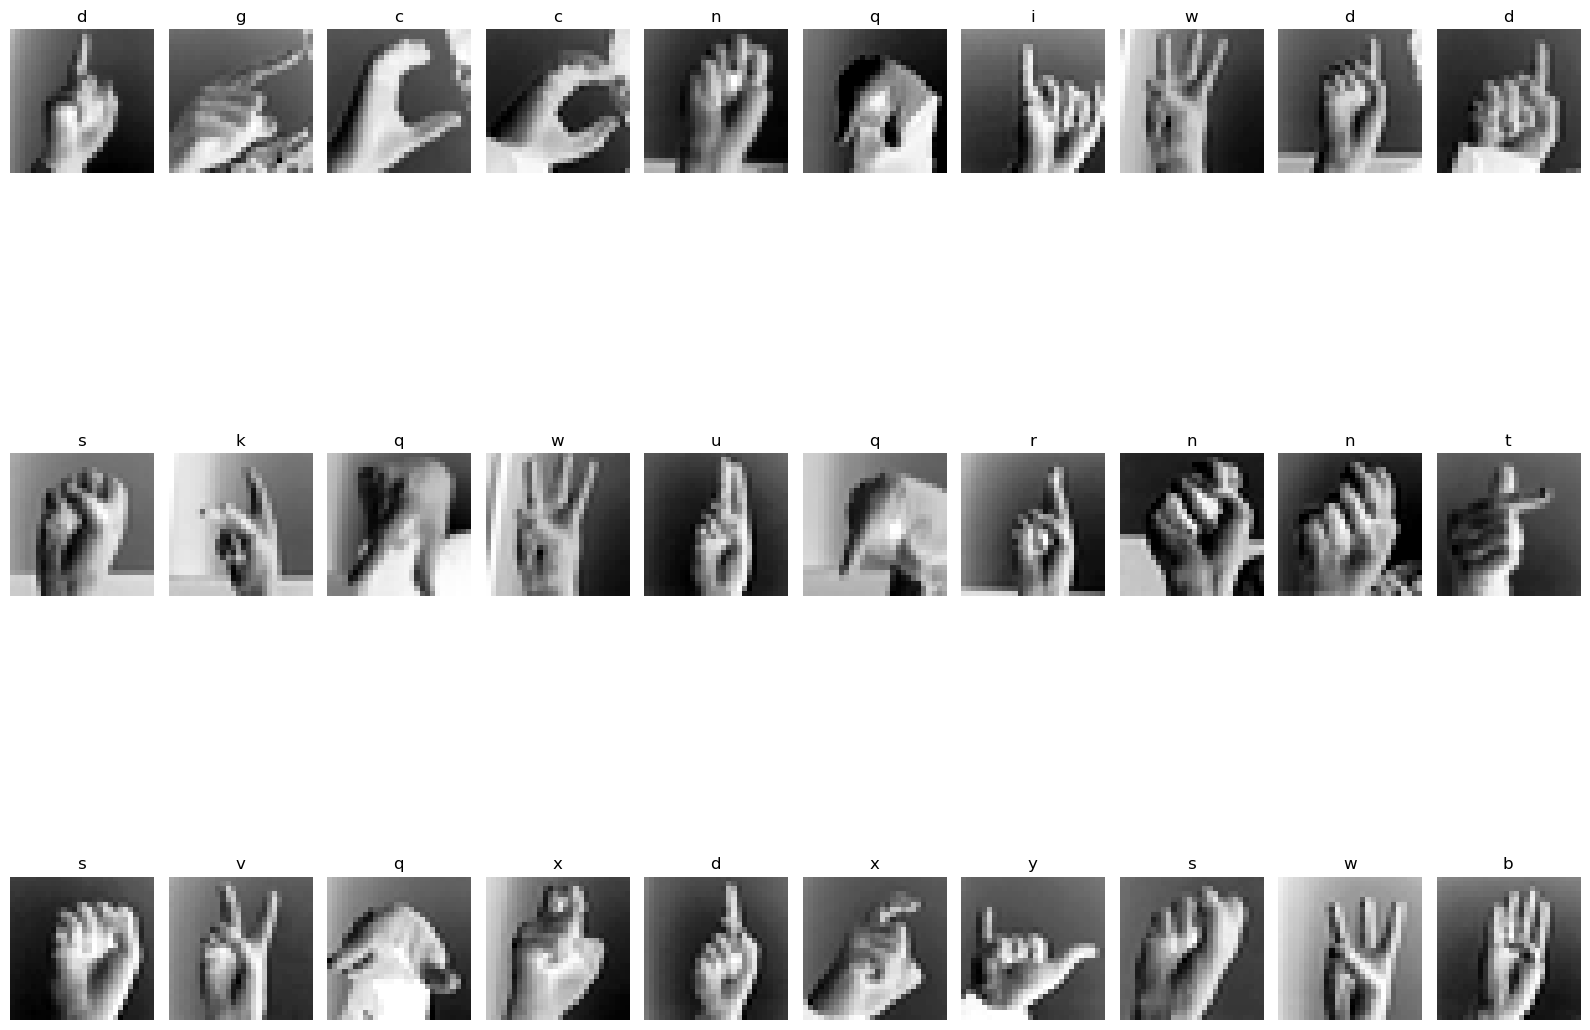

In [10]:
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for i in range(30):
        img = training_images[i]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[i]
        ax.imshow(img, cmap='Greys')
        ax.set_title(f"{letters[int(training_labels[i])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

# Call the function with the training data
plot_categories(training_images, training_labels)